In [23]:
import numpy as np
import matplotlib.pyplot as plt

### NetworkX 
networkx gives us many tools to work with graphs - network of nodes.

### Creating a graph
we import networkx library like this:

In [2]:
import networkx as nx

First we have to have a name for our graph.
Notice the uppercase first letter, Graph follow CapWords naming convention becasue Graph is a class in nx.
(This PEP8 holds more info on style and naming conventions)

In [2]:
G = nx.Graph()    # creates empty graph named G

#### Adding nodes and edges "manually"
Using two methods of ```Graph``` class: ```.add_node``` and ```.add_edge```.

In [3]:
# lets add two Nodes named 'a' and "b" (strings):
G.add_node('a')
G.add_node('b')

# now we can connect them with an edge:
G.add_edge('a', 'b')

#### Using one of nx generators
If the graph that you want to work with is known, have a name\
or belongs to some family of graphs for example full graphs with $n$ nodes\
then there is a chance there is a build in function that generate such a graph.

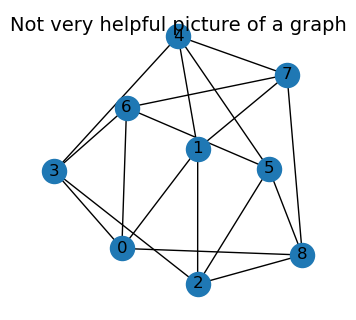

In [15]:
import matplotlib.pyplot as plt

G1 = nx.circulant_graph(9, [1,3]) 
pos = nx.spring_layout(G1, seed=111)

fig = plt.figure(figsize=(3,3)) 
fig.suptitle('Not very helpful picture of a graph', fontsize=14)
nx.draw(G1, with_labels = True, pos=pos)
plt.show()

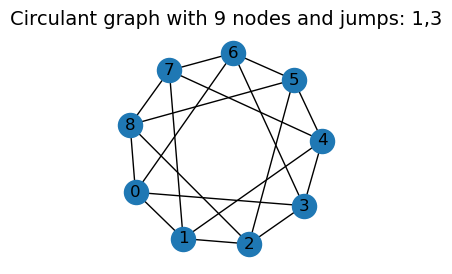

In [13]:
# lets repair, take positions of nodes 1,2,..., 9 from simple circulant_graph with a jump 1.

G1 = nx.circulant_graph(9, [1,3])
frame = nx.circulant_graph(9, [1])
pos_frame = nx.spring_layout(frame, seed=11) 

fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Circulant graph with 9 nodes and jumps: 1,3", fontsize=14)
nx.draw(G2, with_labels = True, pos=pos_frame)

In [34]:
G2.edges

EdgeView([(0, 8), (0, 1), (0, 6), (0, 3), (1, 2), (1, 7), (1, 4), (2, 3), (2, 8), (2, 5), (3, 4), (3, 6), (4, 5), (4, 7), (5, 6), (5, 8), (6, 7), (7, 8)])

### Viewing a graph
nx have few ways to view the Graph data: ```nodes```, ```edges```, ```adj``` and ```degree```

In [8]:
print(f"nodes  = {G.nodes}")
print(f"edges  = {G.edges}")
print(f"adj    = {G.adj}")
print(f"degree = {G.degree}")

nodes  = ['a', 'b']
edges  = [('a', 'b')]
adj    = {'a': {'b': {}}, 'b': {'a': {}}}
degree = [('a', 1), ('b', 1)]


### Graph form array
Lets say that we have a flock saved as a matrix of positions and velocities\
and we have our nearest positions and distances maricies from for example KDTree fucntion.\
Lets calculate algebraic connectivity of our birds and their influences.

In [37]:
connections = np.array([[0, 2, 3],
                        [1, 4, 5],
                        [2, 0, 3],
                        [3, 0, 2],
                        [4, 5, 1],
                        [5, 4, 1]], dtype="int64")

Edges look like this: EdgeView([(0, 8), (0, 1), (0, 6) ...])\
thus we need n nodes and from row in connections ```[0, 2, 3]``` make ```[(0,2), (0,3)]```\
OR\
produce an adjacency matrix from the above. Lets try the second approach:

In [83]:
def graph_from_neighbor_index(arr):
    """ Returns a graph build from indecies output of KDTree.query.
        Parameters: array np.array with arr[i][0] = i and then indecies of neighbors """
    n = len(arr)
    res = np.zeros((n,n))
    np.put_along_axis(res, arr[:,1:], 1, axis=1)
    return nx.from_numpy_array(res)

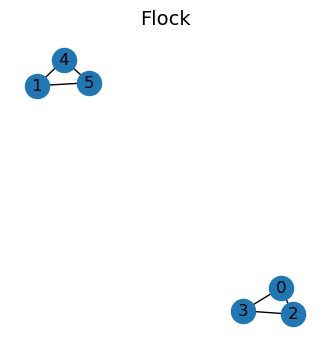

In [88]:
neigh = graph_from_neighbor_index(connections)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title(f"Flock", fontsize=14)
nx.draw(neigh, with_labels = True)
plt.show()

Put the nodes of the graph in the positions of the flock

In [ ]:
...